# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_crypto_total = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total value of your crypto portfolio is ${my_crypto_total:0.2f}")

The current value of your 1.2 BTC is $65835.60
The current value of your 5.3 ETH is $21937.60
The total value of your crypto portfolio is $87773.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_key = os.getenv('ALPACA_API_KEY')
alpaca_secret = os.getenv('ALPACA_API_SECRET')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_key, alpaca_secret, api_version = "v2")

In [64]:
# Format current date as ISO format

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
start = pd.Timestamp('2021-05-12', tz = 'US/Pacific').isoformat()
end = pd.Timestamp('2021-05-12', tz = 'US/Pacific').isoformat()
spy_agg = alpaca.get_barset(tickers, timeframe, start = start, end = end).df

# Preview DataFrame
spy_agg

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-05-12 00:00:00-04:00  113.98  114.01  113.83  113.91  4081575  411.23   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-12 00:00:00-04:00  412.59  406.72  407.48  62036834

In [9]:
# Pick AGG and SPY close prices
agg_close_price = spy_agg.iloc[0, 3]
spy_close_price = spy_agg.iloc[0, 8]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.85
Current SPY closing price: $407.77


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
my_shares_total = my_agg_value + my_spy_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The total value of your shares is ${my_shares_total:0.2f}")

The current value of your 50 SPY shares is $20388.50
The current value of your 200 AGG shares is $22770.00
The total value of your shares is $43158.50


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
savings_data = [{'amount': my_crypto_total}, {'amount': my_shares_total}]
df_savings = pd.DataFrame(savings_data, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,87773.201
shares,43158.500


<AxesSubplot:ylabel='amount'>

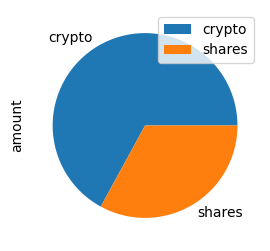

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount', figsize = (3, 3))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_total = my_crypto_total + my_shares_total

# Validate saving health
print("Congratulations, you have enough savings!") if savings_total > emergency_fund else print(f"Must increase savings by ${emergency_fund - savings_total}")

Congratulations, you have enough savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-12', tz='America/New_York').isoformat()

In [38]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
timeframe = '1D'
df_stock_data = alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date, limit = 1000).df

# Display sample data
df_stock_data.sample(5)

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2021-04-22 00:00:00-04:00  114.74  114.8000  114.5900  114.77  3518947.0   
2018-03-12 00:00:00-04:00  106.43  106.4900  106.3700  106.44  3185932.0   
2018-11-06 00:00:00-05:00  104.09  104.1699  104.0635  104.10  2442244.0   
2020-10-06 00:00:00-04:00  117.60  117.8400  117.4900  117.61  3973998.0   
2019-08-08 00:00:00-04:00  112.51  112.8200  112.3300  112.78  3340919.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2021-04-22 00:00:00-04:00  415.88  416.78  411.1300  412.30  90085820.0  
2018-03-12 00:00:00-04:00  279.20  279.91  278.0801  278.50  44169227.0  
2018-11-06 00:00:00-05:00  273.32  275.30  273.2500  275.12  49731823.0  
2020-10-06 00:00:00-04:00  339.92  342.17  334.3800  334.94  74231873.0  
2019-08-08 00:00:00-04:00  289.62  293.56  289.0100  293.55  70688282.0

In [40]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_sim_30 = MCSimulation(df_stock_data, [.4, .6], 500, 252 * 30)


In [41]:
# Printing the simulation input data
# YOUR CODE HERE!
df_stock_data

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-05-22 00:00:00-04:00  109.43  109.48  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.53  109.2100  109.240  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
...                           ...     ...       ...      ...        ...   
2021-05-06 00:00:00-04:00  114.55  114.71  114.5300  114.650  4557111.0   
2021-05-07 00:00:00-04:00  114.85  114.97  114.5700  114.645  6812067.0   
2021-05-10 00:00:00-04:00  114.61  114.72  114.4000  114.430  4737895.0   
2021-05-11 00:00:00-04:00  114.23  114.38  114.1300  114.190  5986487.0   
2021-05-12 00:00:00-04:00  113.98  114.01  113.8300  113.840  3720345.0   

                              SPY                                         
                             open     high      low   close       volume  
time                                                                      
2017-05-22 00:00:00-04:00     NaN      NaN      NaN     NaN          NaN  
2017-05-23 00:00:00-04:00  239.95  240.240  239.510  240.02   36771135.0  
2017-05-24 00:00:00-04:00  240.32  240.730  239.930  240.59   37423590.0  
2017-05-25 00:00:00-04:00  241.20  242.080  240.960  241.71   45278321.0  
2017-05-26 00:00:00-04:00  241.55  241.900  241.450  241.74   30002081.0  
...                           ...      ...      ...     ...          ...  
2021-05-06 00:00:00-04:00  415.83  419.210  413.675  419.08   65397203.0  
2021-05-07 00:00:00-04:00  419.89  422.815  419.160  422.09   58000019.0  
2021-05-10 00:00:00-04:00  422.50  422.740  417.810  417.98   72071656.0  
2021-05-11 00:00:00-04:00  413.10  415.270  410.060  414.27  105794428.0  
2021-05-12 00:00:00-04:00  411.23  412.590  406.720  407.96   57873729.0  

[1001 rows x 10 columns]

In [42]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_sim_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002546,0.996275,1.007781,0.995063,0.999743,0.999536,1.006604,1.001151,1.002556,0.995421,...,0.994137,1.006459,1.005608,0.998200,0.996471,0.996726,1.000723,0.997204,1.004674,0.994763
2,1.007845,0.997782,0.995548,1.000497,1.005598,0.997952,1.004786,0.994249,1.006596,0.995889,...,1.000001,1.005406,1.016392,1.007547,0.986299,0.998841,1.007303,1.002459,1.002270,0.987184
3,1.020519,0.999147,0.997645,1.003914,1.001624,1.002279,0.997228,1.013615,1.015584,0.980046,...,0.996287,1.006973,1.025942,1.006544,0.977961,0.994700,1.006931,0.997250,0.997794,0.981060
4,1.038562,0.997546,1.006570,1.013723,1.005110,1.007009,0.999121,1.024402,1.021541,0.982770,...,0.997145,1.003245,1.036030,1.012862,0.973469,0.994643,1.004904,0.982615,0.990981,0.989256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,32.794200,22.115097,20.880739,6.542038,20.526926,13.081075,21.744218,18.214838,27.632141,16.740291,...,5.059977,43.122181,4.823644,16.740499,29.539875,45.521274,23.440661,6.524042,19.375394,26.728418
7557,32.725556,21.878279,20.952112,6.585561,20.632195,12.937648,21.667355,18.316790,27.601091,16.774907,...,5.094759,42.546898,4.819727,16.599363,29.582097,45.963268,23.710193,6.584491,19.221863,26.552846
7558,32.317820,21.840662,20.904614,6.540688,20.828813,12.926553,21.331536,18.384086,27.530490,16.695486,...,5.180416,42.246916,4.824312,16.543482,29.850683,45.500803,23.915631,6.578212,19.235878,26.829186
7559,31.922653,21.874824,20.838228,6.589033,20.838274,12.917737,21.407329,18.536338,27.531347,16.730392,...,5.164127,42.559540,4.851806,16.571575,30.036830,45.327953,23.915396,6.630672,19.350978,26.558779


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

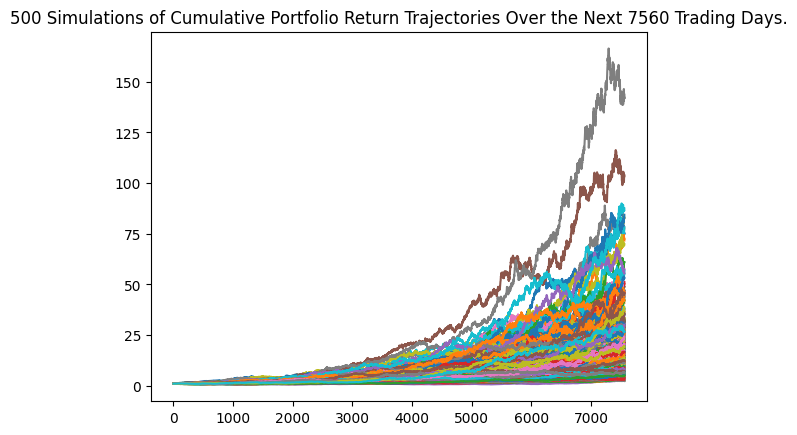

In [45]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_sim_30.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

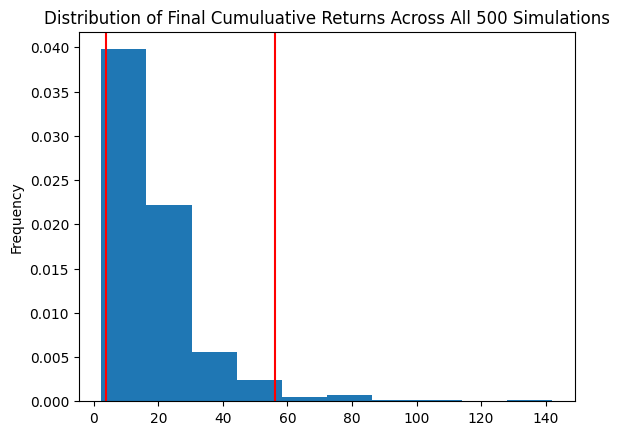

In [46]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_sim_30.plot_distribution()

### Retirement Analysis

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
my_sim_summary = mc_sim_30.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(my_sim_summary)
type(my_sim_summary)

count           500.000000
mean             18.389328
std              14.759942
min               2.287367
25%               9.434092
50%              14.135920
75%              22.454056
max             142.069105
95% CI Lower      3.771721
95% CI Upper     55.989920
Name: 7560, dtype: float64


pandas.core.series.Series

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [74]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(my_sim_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper = round(my_sim_summary.loc['95% CI Upper'] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $75434.42 and $1119798.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [75]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(my_sim_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper = round(my_sim_summary.loc['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $113151.62 and $1679697.59


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")